### MNIST CNN Project **[ANSWER SHEET]**

##### How to work through this project:
- Go cell by cell and finish the marked #TODO's
- You don't need to touch the code marked between the `#---------#`. Those are puzzle pieces that your code will fit into!
    - However, I **STRONGLY** encourage you to understand every single line between those blocks. They are essential!
    - It is crucial that your variable names are what we expect them to be, or the puzzle pieces won't fit.
- Tutorials/helpful information will be placed in the `.md` cells above the "work" cells. Consult them if you are stuck.
- If you REALLY cannot find the correct code to make the cell run, consult the `[proj]-ans.ipynb`.
- The final product (what we expect to see if you run all the cells consecutively) will be placed in the `answers/` directory.
    - Chances are your output won't be the exact same (stochasticity!) but it should be similar

In [122]:
# Get used to these imports!
#----------------------------------------------------------------#
#To install: pip install numpy
import numpy as np 
#To install: pip install matplotlib
import matplotlib.pyplot as plt 
#To install: pip install torchvision
import torchvision as tv
import torchvision.transforms as transforms
#To install: pip install torch (not GPU compatible)
import torch
import torch.nn as nn
#----------------------------------------------------------------#

In [123]:
# Below is the train/test data from F-MNIST. Try and find their shapes
# This is different than normal MNIST! You will see this below
#----------------------------------------------------------------#
train_data = tv.datasets.FashionMNIST('./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = tv.datasets.FashionMNIST('./data', train=False, transform=transforms.ToTensor(), download=True)
#----------------------------------------------------------------#
## TODO: Find and print the shapes of train_data and test_data
# Print the shape of data and the shape of labels
"""
Tips:
- To get just the data from (train/test)_data, you will need to do (train/test)_data.data
- To get just the labels from (train/test)_data, you will need to do (train/test)_data.targets
- Then use .numpy() to convert the data into a numpy array, which you can then call .shape on
"""

#! Answer
print(f"Train Data Shape:{train_data.data.numpy().shape}") # = (60000, 28, 28)
print(f"Train Label Shape:{train_data.targets.numpy().shape}") # = (60000,)

print(f"Test Data Shape:{test_data.data.numpy().shape}") # = (10000, 28, 28)
print(f"Test Label Shape:{test_data.targets.numpy().shape}") # = (10000,)

Train Data Shape:(60000, 28, 28)
Train Label Shape:(60000,)
Test Data Shape:(10000, 28, 28)
Test Label Shape:(10000,)


The following code block is short, but ***incredibly important***. It shows how to set up a **Dataloader** which is needed to pass data through a neural network. Try to get familiar with the syntax.

Notice how even though we have changed the Dataset, the dataloaders are the same. That is why MNIST is so useful! It is very modular.

In [124]:
# Creates dataloaders from the MNIST dataset
batch_size = 60
#----------------------------------------------------------------#
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False) 
#----------------------------------------------------------------#

Lets visualize the data! This will be different than last time since we are workign with dataloaders.

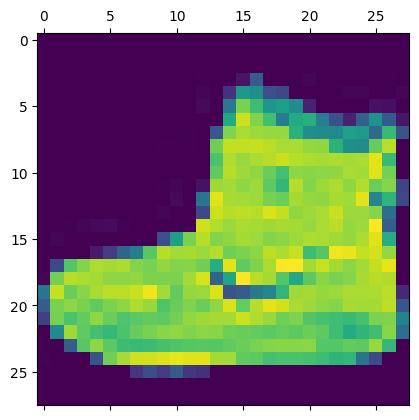

Associated Label: 9


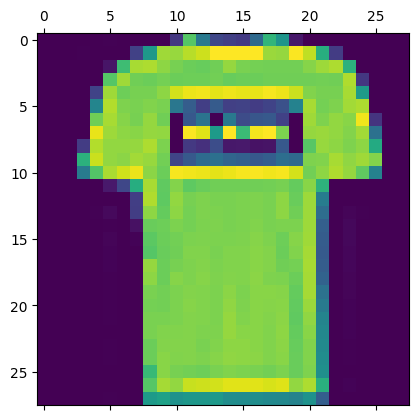

Associated Label: 0


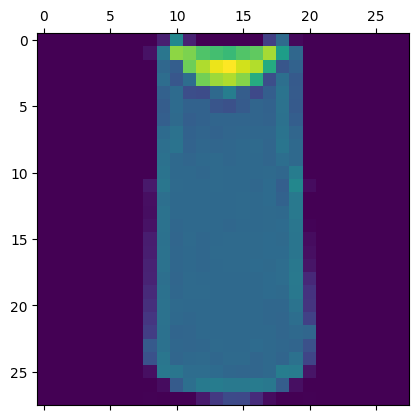

Associated Label: 0


In [125]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show. Notice how reshape is used to get the data into proper format for visualization.
# Note the use of reshape!
#----------------------------------------------------------------#
num_of_digits_to_viz = 3
for i in range(num_of_digits_to_viz):
    to_reshape = train_data.data.numpy()[i]
    plt.matshow(to_reshape.reshape(28, 28))
    plt.show()
    print(f"Associated Label: {train_data.targets.numpy()[i]}")
#----------------------------------------------------------------#

So far, this has been similar to the MNIST-DNN Project. When does it diverge? Well first we are going to make a DNN to try and classify these fashion images and then check the accuracy we get. Then we will compare it to the accuracy of a CNN on the **exact same data**.

In [126]:
# Goal: Make a neural network that can classify MNIST
# No example network provided this time! Refer back to Unit 2 if youre stuck on how to make a DNN

## TODO: Create the following required NN class that can work with MNIST data, and then instantiate a model

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
###! MAKE SURE YOUR NEURAL NETWORK HAS AT LEAST 3 HIDDEN LAYERS AND DOES NOT HAVE HARDCODED LAYER SIZE VALUES!###
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# MNIST_DNN: The name of your class
# model: An instance of MNIST_DNN
"""
Tips:
- Think about what input and output sizes you want
- Hidden layers can be most anything, just make sure to reduce gradually
- Remind yourself what activations are and why they are useful
- Make sure to name your class "F_MNIST_DNN"
- Instead of hardcoding the numbers in for the layer sizes, make them passable parameters
- Make sure to actually make your model using model = MNIST_DNN(...) as the last line
"""

#! Answer
class F_MNIST_DNN(nn.Module):
    def __init__(self, input_layer_size, hlA_size, hlB_size, output_layer_size):
        super(F_MNIST_DNN, self).__init__()

        # Structure
        self._input_layer_size = input_layer_size
        self._hlA_size = hlA_size
        self._hlB_size = hlB_size
        self._output_layer_size = output_layer_size

        # Layers
        self._l1 = nn.Linear(self._input_layer_size, self._hlA_size)
        self._l2 = nn.Linear(self._hlA_size, self._hlB_size)
        self._l3 = nn.Linear(self._hlB_size, self._output_layer_size)

        # Activations
        self._sigmoid = nn.Sigmoid()
        self._softmax = nn.Softmax(dim=1)
    
    def forward(self, input):
        x = self._l1(input)
        x = self._sigmoid(x)
        x = self._l2(x)
        x = self._sigmoid(x)
        x = self._l3(x)
        output = self._softmax(x)
        return output

# Middle 2 numbers can be basically anything reasonable
model = F_MNIST_DNN(784, 256, 64, 10)

__Now your task will be to train and test the model__. Again, refer back to **unit 2** if any of this has slipped from your memory (that is totally fine). However, don't get discouraged at the difficulty because none of this is new! You did it before and can do it again. We have provided the loss function and optimizer, but nothing else.

In [127]:
# Feel free to mess with the code in here once you have finished the project to see what effect it will have.
# For now, though, simply read and accept the syntax as-is
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adaptive Optimizer
#----------------------------------------------------------------#

## TODO: Implement the training loop for your model. Reference unit 2 example if stuck.

#! Answer
num_epochs = 3
n_total_steps = len(train_loader)
for epoch in range(num_epochs): # One epoch is one time going through all of the training data
    for i, (images, labels) in enumerate(train_loader): # Dataloaders let you use easy syntax like this

        # Reshaping 
        # original shape: [100, 1, 28, 28], batch of images
        images = images.reshape(-1, 28*28)
        # resized: [100, 784], batch of vectorized images

        # Forwardpropagation
        # This calls "forward" in the MNIST_DNN class
        outputs = model(images)

        # Calculates the loss of this batch by using the labels
        loss = loss_func(outputs, labels)

        # Backward and optimize, this sequence of 3 lines is pretty standard/set in stone. Just memorize it!
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        # Showing training steps
        if (i+1) % 100 == 0:
             print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/3], Step[100/1000], Loss: 1.9887
Epoch [1/3], Step[200/1000], Loss: 1.9446
Epoch [1/3], Step[300/1000], Loss: 1.8283
Epoch [1/3], Step[400/1000], Loss: 1.7593
Epoch [1/3], Step[500/1000], Loss: 1.7555
Epoch [1/3], Step[600/1000], Loss: 1.7434
Epoch [1/3], Step[700/1000], Loss: 1.7048
Epoch [1/3], Step[800/1000], Loss: 1.7704
Epoch [1/3], Step[900/1000], Loss: 1.7136
Epoch [1/3], Step[1000/1000], Loss: 1.7009
Epoch [2/3], Step[100/1000], Loss: 1.6589
Epoch [2/3], Step[200/1000], Loss: 1.6588
Epoch [2/3], Step[300/1000], Loss: 1.6280
Epoch [2/3], Step[400/1000], Loss: 1.5970
Epoch [2/3], Step[500/1000], Loss: 1.6855
Epoch [2/3], Step[600/1000], Loss: 1.7217
Epoch [2/3], Step[700/1000], Loss: 1.6970
Epoch [2/3], Step[800/1000], Loss: 1.6929
Epoch [2/3], Step[900/1000], Loss: 1.5982
Epoch [2/3], Step[1000/1000], Loss: 1.6268
Epoch [3/3], Step[100/1000], Loss: 1.6933
Epoch [3/3], Step[200/1000], Loss: 1.7046
Epoch [3/3], Step[300/1000], Loss: 1.5976
Epoch [3/3], Step[400/1000], Los

Here is the testing loop again. Run it to see how your accuracy is! 

Then run all your code and see what your **final accuracy** is!

In [128]:
# Note the use of torch.no_grad() and torch.max(). Be sure you know what they are doing
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item() 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %') 
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 81.03 %


Expected accuracy: ~80%

Great job! We have made a DNN classifier for F-MNIST. Hopefully you are comfortable making models now, **since you will now be making a CNN!**

Let's see if the CNN's architectural differences will allow it to score higher than a standard DNN.

Check out these resources. The tutorial is **especially** helpful:
- [Conv2d Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [F_MNIST with a CNN Tutorial](https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118)

In [129]:
# Goal: Make a convolutional neural network that can classify F-MNIST
# Provided below is a syntactical example of a CNN, study it and try and make one that will fit F-MNIST

class CNN_EXAMPLE(nn.Module):
    def __init__(self):
        super(CNN_EXAMPLE, self).__init__()

        # Structure
        input_channels = 1 # Represents the number of color channels an image has. We are working with grayscale so it will be 1. RGB would be 3.

        # Convolutional Layers
        self.conv_l1 = nn.Conv2d(in_channels=input_channels, out_channels=5, kernel_size=(3, 3), stride=1)

        # Feedforward Layers
        self.ff1 = nn.Linear(845, 10) # The input number selected here is dependent on the size of the output from the previous layers. You can do some printing of shapes to figure out what it should be.

        # Maxpool Layers
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2)

        # Activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()

    
    def forward(self, input):
        x = self.conv_l1(input)
        x = self.sigmoid(x)
        x = self.maxpool(x)
        
        x = torch.flatten(x, 1)

        print(x.detach().numpy().shape) # Can help you find the necessary input size for the feedforward part!!!

        output = self.ff1(x)

        return output

## TODO: Create the following required NN class that can work with MNIST data, and then instantiate a model

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
###! MAKE SURE YOUR NEURAL NETWORK HAS AT LEAST 2 CONVOLUTION LAYERS! THE EXAMPLE ONLY HAS 1 !###
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# F_MNIST_CNN: The name of your class
# f_model: An instance of F_MNIST_CNN
"""
Tips:
- The transition from convolutional to linear layers is tough
    - Print out the shape of the object right before it is supposed to go into the linear layer to find out how big the layer input size should be
    - **You may need to make the training loop in advance to do this**
- When you flatten, do it exactly as shown in the example (x = torch.flatten(x, 1)) to ensure you flatten across the right dimension
- Ignore the first dimension when printing out the shape of x before flattening (as shown above in the example), since it is the batch size
- Make sure to name your class "F_MNIST_CNN"
- Instead of hardcoding the numbers in for the input channels and output size, make them passable parameters
- Make sure to actually make your model using f_model = F_MNIST_DNN(...) as the last line
"""

#! Answer (one of many!)
class F_MNIST_CNN(nn.Module):
    def __init__(self, input_channels, output_size):
        super(F_MNIST_CNN, self).__init__()

        # Convolutional Layers
        self.conv_l1 = nn.Conv2d(in_channels=input_channels, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.conv_l2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)

        # Feedforward Layers
        self.ff1 = nn.Linear(1568, 512)
        self.ff2 = nn.Linear(512, output_size)

        # Maxpool Layers
        self.maxpool = nn.MaxPool2d(kernel_size=2)

        # Activations
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    
    def forward(self, input):
        x = self.conv_l1(input)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv_l2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = torch.flatten(x, 1)

        x = self.ff1(x)
        x = self.relu(x)
        output = self.ff2(x)

        return output

f_model = F_MNIST_CNN(1, 10)

Below is where you should make your training loop. It will be very similar to the DNN training loop **with some slight alterations**.

In [130]:
# Feel free to mess with the code in here once you have finished the project to see what effect it will have.
# For now, though, simply read and accept the syntax as-is
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(f_model.parameters(), lr=0.01) # Adaptive Optimizer
#----------------------------------------------------------------#

## TODO: Implement the training loop for your model

"""
Tips:
- Is there any need to reshape at all? Think about what a convolution acts on dimension-wise
- Everything except for the thing mentioned above will be the same!
"""

#! Answer
num_epochs = 3
n_total_steps = len(train_loader)
for epoch in range(num_epochs): # One epoch is one time going through all of the training data
    for i, (images, labels) in enumerate(train_loader): # Dataloaders let you use easy syntax like this

        # Forwardpropagation
        # This calls "forward" in the F_MNIST_CNN class
        outputs = f_model(images)

        # Calculates the loss of this batch by using the labels
        loss = loss_func(outputs, labels)

        # Backward and optimize, this sequence of 3 lines is pretty standard/set in stone. Just memorize it!
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        # Showing training steps
        if (i+1) % 100 == 0:
             print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/3], Step[100/1000], Loss: 0.3661
Epoch [1/3], Step[200/1000], Loss: 0.3356
Epoch [1/3], Step[300/1000], Loss: 0.2786
Epoch [1/3], Step[400/1000], Loss: 0.7129
Epoch [1/3], Step[500/1000], Loss: 0.2463
Epoch [1/3], Step[600/1000], Loss: 0.2986
Epoch [1/3], Step[700/1000], Loss: 0.4187
Epoch [1/3], Step[800/1000], Loss: 0.5827
Epoch [1/3], Step[900/1000], Loss: 0.3280
Epoch [1/3], Step[1000/1000], Loss: 0.2721
Epoch [2/3], Step[100/1000], Loss: 0.4161
Epoch [2/3], Step[200/1000], Loss: 0.4356
Epoch [2/3], Step[300/1000], Loss: 0.1995
Epoch [2/3], Step[400/1000], Loss: 0.4068
Epoch [2/3], Step[500/1000], Loss: 0.3730
Epoch [2/3], Step[600/1000], Loss: 0.3823
Epoch [2/3], Step[700/1000], Loss: 0.4286
Epoch [2/3], Step[800/1000], Loss: 0.2816
Epoch [2/3], Step[900/1000], Loss: 0.3441
Epoch [2/3], Step[1000/1000], Loss: 0.4798
Epoch [3/3], Step[100/1000], Loss: 0.3796
Epoch [3/3], Step[200/1000], Loss: 0.3496
Epoch [3/3], Step[300/1000], Loss: 0.2379
Epoch [3/3], Step[400/1000], Los

Here is the testing loop again. Run it to see how your accuracy is! 

Then run all your code and see what your **final accuracy** is!

In [131]:
# Note the use of torch.no_grad() and torch.max(). Be sure you know what they are doing
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        outputs = f_model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item() 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %') 
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 86.14 %


Expected accuracy ~85%

Looks like the CNN did do better! Feel free to mess with the parameters to see if you can get a better score. **Note that CNNs are more finnicky than DNNs, so your score may tank sometimes**.

### Congratulations on completing the project! Check your results with the notebook in the `answers` directory and then send your final accuracy to your club/channel/mentor!